In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
#from hana_ml.algorithms.pal.tsa.vector_arima import VectorARIMA

In [2]:
Daily_Precp = pd.read_csv('Daily Precipitation.csv')
Daily_Soil_Mosit = pd.read_csv('Daily Soil Mositure.csv')
Daily_Temp = pd.read_csv('Daily Temperature.csv')
Prod_Quant = pd.read_csv('Production Quantity.csv')

In [3]:
Prod_Quant = Prod_Quant.drop('start_date',axis = 1)
Prod_Quant['end_date'] = pd.to_datetime(Prod_Quant['end_date']).dt.date

In [4]:
Prod_Quant['end_date'] =  Prod_Quant['end_date'].astype('datetime64[ns]')
Prod_Quant.set_index('end_date')
Prod_Quant.iloc[60:72,]

,end_date,prod,region_id
60,2020-01-31,184890,93
61,2020-02-29,228046,93
62,2020-03-31,242595,93
63,2020-04-30,274686,93
64,2020-05-31,260507,93
65,2020-06-30,321550,93
66,2020-07-31,303763,93
67,2020-08-31,301528,93
68,2020-09-30,302692,93
69,2020-10-31,273522,93


# Daily_Precp end_date is converted into datetime64[ns]

In [5]:
Daily_Precp['end_date'] = pd.to_datetime(Daily_Precp['end_date']).dt.date
#Daily_Precp['end_date']

In [6]:
Daily_Precp.end_date = pd.to_datetime(Daily_Precp.end_date)

In [7]:
Daily_Precp = Daily_Precp.groupby('region_id').resample('M',on='end_date').mean()

In [8]:
Daily_Precp = Daily_Precp.droplevel(level=0)

In [9]:
Daily_Precp = Daily_Precp.loc[(Daily_Precp.index >= '2015-01-31')]
Daily_Precp= Daily_Precp.loc[(Daily_Precp.index <= '2020-12-31')]
Daily_Precp

,precip,region_id
end_date,,
2015-01-31,4.394452,93
2015-02-28,1.206137,93
2015-03-31,3.454652,93
2015-04-30,10.466472,93
2015-05-31,9.007986,93
...,...,...
2020-08-31,7.635350,105
2020-09-30,6.852630,105
2020-10-31,11.276676,105


In [10]:
Daily_Precp.reset_index(inplace=True)

In [11]:
Daily_Precp.shape

(720, 3)

# Daily_Soil_Mosit end_date is converted into datetime64

In [12]:
Daily_Soil_Mosit['end_date'] = pd.to_datetime(Daily_Soil_Mosit['end_date']).dt.date
#Daily_Precp['end_date']
Daily_Soil_Mosit.end_date = pd.to_datetime(Daily_Soil_Mosit.end_date)
Daily_Soil_Mosit = Daily_Soil_Mosit.groupby('region_id').resample('M',on='end_date').mean()
Daily_Soil_Mosit = Daily_Soil_Mosit.droplevel(level=0)
Daily_Soil_Mosit = Daily_Soil_Mosit.loc[(Daily_Soil_Mosit.index >= '2015-01-31')]
Daily_Soil_Mosit= Daily_Soil_Mosit.loc[(Daily_Soil_Mosit.index <= '2020-12-31')]

In [13]:
Daily_Soil_Mosit.head(2)

,smos,region_id
end_date,,
2015-01-31,0.318552,93
2015-02-28,0.291452,93


In [14]:
Daily_Soil_Mosit.reset_index(inplace=True)

In [15]:
Daily_Soil_Mosit.shape

(720, 3)

# Daily_Temp end_date is converted into datetime64[ns]
# We have monthly mean values for 10 regions and for 6 years

In [16]:
Daily_Temp['end_date'] = pd.to_datetime(Daily_Temp['end_date']).dt.date
#Daily_Precp['end_date']
Daily_Temp.end_date = pd.to_datetime(Daily_Temp.end_date)
Daily_Temp = Daily_Temp.groupby('region_id').resample('M',on='end_date').mean()
Daily_Temp = Daily_Temp.droplevel(level=0)
Daily_Temp = Daily_Temp.loc[(Daily_Temp.index >= '2015-01-31')]
Daily_Temp= Daily_Temp.loc[(Daily_Temp.index <= '2020-12-31')]

In [17]:
Daily_Temp.reset_index(inplace=True)

In [18]:
Daily_Temp.shape

(720, 3)

# Eight_Day_NDVI is converted into datetime64[ns]
# We have monthly mean values for Eight_Day_NDVI

In [19]:
Eight_Day_NDVI = pd.read_csv('Eight Day NDVI.csv')

In [20]:
Eight_Day_NDVI['end_date'] = pd.to_datetime(Eight_Day_NDVI['end_date']).dt.date
Eight_Day_NDVI.end_date = pd.to_datetime(Eight_Day_NDVI.end_date)

In [21]:
Eight_Day_NDVI = Eight_Day_NDVI.groupby('region_id').resample('M',on='end_date').mean()

In [22]:
Eight_Day_NDVI = Eight_Day_NDVI.droplevel(level=0)

In [23]:
Eight_Day_NDVI

,ndvi,region_id
end_date,,
2014-01-31,0.718269,93.0
2014-02-28,0.767647,93.0
2014-03-31,0.743301,93.0
2014-04-30,0.807792,93.0
2014-05-31,0.813410,93.0
...,...,...
2021-11-30,0.798444,105.0
2021-12-31,0.811967,105.0
2022-01-31,0.804896,105.0


In [24]:
Eight_Day_NDVI = Eight_Day_NDVI.loc[(Eight_Day_NDVI.index > '2015')]
Eight_Day_NDVI= Eight_Day_NDVI.loc[(Eight_Day_NDVI.index <  '2021')]

In [25]:
Eight_Day_NDVI.reset_index(inplace=True)

In [26]:
Eight_Day_NDVI.shape

(720, 3)

# Merging dataframe

In [27]:
Prod_Quant.shape

(720, 3)

In [28]:
Daily_Precp[~Daily_Precp.end_date.isin(Prod_Quant.end_date)]

,end_date,precip,region_id


In [29]:
Daily_Precp['end_date'].equals(Prod_Quant['end_date'])

True

In [30]:
new_df1 = pd.merge(Daily_Precp, Eight_Day_NDVI,  how='left', left_on=['end_date','region_id'], right_on = ['end_date','region_id'])

In [31]:
new_df2 = pd.merge(Daily_Soil_Mosit, Daily_Temp,  how='left', left_on=['end_date','region_id'], right_on = ['end_date','region_id'])

In [32]:
new_df3 = pd.merge(new_df1, new_df2,  how='left', left_on=['end_date','region_id'], right_on = ['end_date','region_id'])

In [33]:
new_df3.shape

(720, 6)

In [34]:
new_df4 = pd.merge(new_df3, Prod_Quant,  how='left', left_on=['end_date','region_id'], right_on = ['end_date','region_id'])

In [35]:
 new_df4.isnull().sum()

end_date     0
precip       0
region_id    0
ndvi         7
smos         0
temp         0
prod         0
dtype: int64

In [36]:
new_df4.set_index('end_date', inplace=True)

In [37]:
new_df4[72:144]

,precip,region_id,ndvi,smos,temp,prod
end_date,,,,,,
2015-01-31,1.444303,94,0.782787,0.268754,26.559232,15066
2015-02-28,2.235412,94,0.700457,0.250164,29.142522,20527
2015-03-31,2.872151,94,0.700407,0.223470,29.612283,31839
2015-04-30,11.580010,94,0.723666,0.294180,27.654164,33341
2015-05-31,10.652136,94,0.773010,0.320435,26.173197,35627
...,...,...,...,...,...,...
2020-08-31,6.469287,94,0.819262,0.290101,27.710981,17199
2020-09-30,12.576505,94,0.810091,0.329871,26.779885,16695
2020-10-31,7.865374,94,0.797045,0.407462,26.969045,13235


In [38]:
mean_value=new_df4['ndvi'].mean()
mean_value

0.799806239007302

In [39]:
new_df4['ndvi'].fillna(value=new_df4['ndvi'].mean(), inplace=True)

In [40]:
new_df4.isnull().sum()

precip       0
region_id    0
ndvi         0
smos         0
temp         0
prod         0
dtype: int64

In [41]:
new_df4['region_id'].unique()

array([ 93,  94,  95,  97,  98,  99, 102, 103, 104, 105], dtype=int64)

# ARIMA MODEL
# ID = 93 and model is  evaluated using MAPE and R2

In [42]:
var = new_df4[0:72]
var = var.drop(columns=['region_id'])

In [43]:
X = var.values

In [44]:
size = int(len(X) * 0.84)
train, test = X[0:size], X[size:len(X)]

In [45]:
history = [x for x in train]
predictions = list()

In [46]:
model = VAR(train)

In [47]:
test.shape

(12, 5)

In [48]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  7.1919499553550965
BIC:  8.24832492683258

Order = 2
AIC:  7.338265865112115
BIC:  9.292134237181996

Order = 3
AIC:  7.539079874288996
BIC:  10.406520250197136

Order = 4
AIC:  7.1838091322951705
BIC:  10.981343552423578

Order = 5
AIC:  7.103930247677027
BIC:  11.848535958226504

Order = 6
AIC:  6.181170786894732
BIC:  11.890291661292189

Order = 7
AIC:  6.319593055122545
BIC:  13.011150497375036

Order = 8
AIC:  4.762676804892868
BIC:  12.455079926223496

Order = 9
AIC:  -7.415330733385279
BIC:  1.296824080861679

Order = 10
AIC:  -168.3212459256611
BIC:  -158.56992859797754



In [49]:
result = model.fit(4)
# result.summary()

In [50]:
lagged_Values = train

In [51]:
pred = result.forecast(y=lagged_Values, steps=24)

In [52]:
idx = pd.date_range('2020-1-01', periods=12, freq='MS')

In [53]:
df_forecast=pd.DataFrame(data=pred[0:12], index=idx, columns=['precip','ndvi','smos','temp','prod'])

In [54]:
df_forecast['prod']

2020-01-01    201882.168712
2020-02-01    206868.409562
2020-03-01    234074.602563
2020-04-01    272965.789256
2020-05-01    292729.705909
2020-06-01    310986.463784
2020-07-01    314017.748781
2020-08-01    308465.985351
2020-09-01    303769.352612
2020-10-01    288861.756461
2020-11-01    271790.327276
2020-12-01    251450.353206
Freq: MS, Name: prod, dtype: float64

In [55]:
#new_df_93.tail(12)['prod']

In [56]:
Prod_Quant.iloc[60:72,]

,end_date,prod,region_id
60,2020-01-31,184890,93
61,2020-02-29,228046,93
62,2020-03-31,242595,93
63,2020-04-30,274686,93
64,2020-05-31,260507,93
65,2020-06-30,321550,93
66,2020-07-31,303763,93
67,2020-08-31,301528,93
68,2020-09-30,302692,93
69,2020-10-31,273522,93


In [57]:
df_forecast

,precip,ndvi,smos,temp,prod
2020-01-01,6.217722,0.850714,0.351200,27.302265,201882.168712
2020-02-01,6.035725,0.824569,0.352595,28.117769,206868.409562
2020-03-01,5.147593,0.841365,0.318202,30.158297,234074.602563
2020-04-01,6.362057,0.812697,0.321919,30.001172,272965.789256
2020-05-01,7.335307,0.830898,0.316494,30.165856,292729.705909
2020-06-01,7.035983,0.829224,0.347606,28.880491,310986.463784
2020-07-01,6.981286,0.837259,0.358112,28.610281,314017.748781
2020-08-01,6.200317,0.811998,0.361660,28.430230,308465.985351
2020-09-01,6.593780,0.807882,0.352155,29.022165,303769.352612
2020-10-01,7.936992,0.795563,0.357913,29.109587,288861.756461


In [58]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [59]:
actual = Prod_Quant.iloc[60:72,]['prod']
pred = df_forecast['prod']
mape(actual, pred)


6.3200586850684095

In [60]:
temp = Prod_Quant.iloc[60:72,].set_index('end_date')

In [61]:
temp = temp['prod']

In [62]:
r2_score(Prod_Quant.iloc[60:72,]['prod'].values, df_forecast['prod'].values)

0.7754648675058181

# R2 = 0.7754648675058181
# MAPE = 6.3200586850684095

<AxesSubplot:xlabel='end_date'>

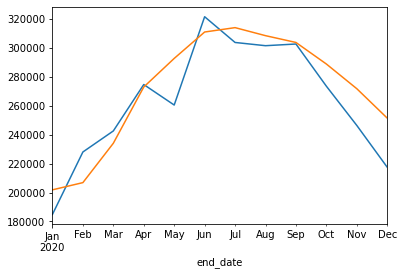

In [63]:
ax = temp.plot()
df_forecast['prod'].plot(ax=ax)

In [64]:
Prod_Quant_pred = pd.read_csv('predicted_production_qty.csv')

In [65]:
Prod_Quant_pred[12:24]

,start_date,end_date,prod,region_id
12,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,94
13,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,94
14,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,94
15,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,94
16,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,94
17,2021-06-01T00:00:00.000Z,2021-06-30T00:00:00.000Z,NaN,94
18,2021-07-01T00:00:00.000Z,2021-07-31T00:00:00.000Z,NaN,94
19,2021-08-01T00:00:00.000Z,2021-08-31T00:00:00.000Z,NaN,94
20,2021-09-01T00:00:00.000Z,2021-09-30T00:00:00.000Z,NaN,94
21,2021-10-01T00:00:00.000Z,2021-10-31T00:00:00.000Z,NaN,94


# Predicting Values for all regions for 2021_Jan to 2021_Dec

In [66]:
a = [ 93,  94,  95,  97,  98,  99, 102, 103, 104, 105]

In [67]:
k = 0
for x in range(0, 10):
    globals()['df%s' % a[x]] = new_df4[k:k+72]    
    k += 72

In [68]:
k = 0
for x in range(0,10):    
    #allocate 72 values
    temp_value = new_df4[k:k+72]
    k+= 72
    #region id droped and allocated to a variable
    region_id = temp_value['region_id'].unique()
    region_id = region_id[0]
    temp_value = temp_value.drop(columns=['region_id'])
    
    #allocate array for VAR
    X = temp_value.values
    
    #train test split
    size = int(len(X) * 0.84)
    train, test = X[0:size], X[size:len(X)]
    
    #modeling with order of 4
    model = VAR(train)
    result = model.fit(4)
    lagged_Values = train
    
    #with 24 steps, future 24 months are predicted
    pred = result.forecast(y=lagged_Values, steps=24)
    idx = pd.date_range('2020-1-01', periods=12, freq='MS')
    
    #forecasted dataframe values
    df_forecast=pd.DataFrame(data=pred[0:12], index=idx, columns=['precip','ndvi','smos','temp','prod'])
    
    def mape(actual, pred):
        actual, pred = np.array(actual), np.array(pred)
        return np.mean(np.abs((actual - pred) / actual)) * 100
    
    # pred and actual values for mape and r2 score
    actual = Prod_Quant.iloc[k-12:k,]['prod']
    pred = df_forecast['prod']
    
    mape =mape(actual, pred)
    
    temp2 = Prod_Quant.iloc[k-12:k,].set_index('end_date')    
    r2 = r2_score(Prod_Quant.iloc[k-12:k,]['prod'].values, df_forecast['prod'].values)
    print("The mape and r2 for test data in the year 2020 and region_id", region_id, "is")    
    print(mape,r2)
    print("-----------------------------------------------------------------------------")

The mape and r2 for test data in the year 2020 and region_id 93 is
6.3200586850684095 0.7754648675058181
-----------------------------------------------------------------------------
The mape and r2 for test data in the year 2020 and region_id 94 is
35.20085970408015 -0.5909450440570341
-----------------------------------------------------------------------------
The mape and r2 for test data in the year 2020 and region_id 95 is
16.312779165863006 0.6000915557496479
-----------------------------------------------------------------------------
The mape and r2 for test data in the year 2020 and region_id 97 is
24.898135309446165 -0.6557251909194888
-----------------------------------------------------------------------------
The mape and r2 for test data in the year 2020 and region_id 98 is
10.858263906241607 0.7386603493314344
-----------------------------------------------------------------------------
The mape and r2 for test data in the year 2020 and region_id 99 is
9.615361330621587

In [69]:
value_for_2021 = []

In [70]:
k = 0
for x in range(0,10):    
    #allocate 72 values
    temp_value = new_df4[k:k+72]
    k+= 72
    #region id droped and allocated to a variable
    region_id = temp_value['region_id'].unique()
    region_id = region_id[0]
    temp_value = temp_value.drop(columns=['region_id'])
    
    #allocate array for VAR
    X = temp_value.values
    
    #train test split
    size = int(len(X) * 0.84)
    train, test = X[0:size], X[size:len(X)]
    
    #modeling with order of 4
    model = VAR(train)
    result = model.fit(4)
    lagged_Values = train
    
    #with 24 steps, future 24 months are predicted
    pred = result.forecast(y=lagged_Values, steps=24)
    idx = pd.date_range('2021-1-01', periods=12, freq='MS')
    
    #forecasted dataframe values
    df_forecast=pd.DataFrame(data=pred[12:24], index=idx, columns=['precip','ndvi','smos','temp','prod'])
    print(df_forecast)
    value_for_2021.append(df_forecast['prod'].values)

              precip      ndvi      smos       temp           prod
2021-01-01  6.775386  0.815403  0.364968  28.314536  238745.470754
2021-02-01  6.006834  0.814997  0.354214  28.480725  236408.854960
2021-03-01  5.875892  0.819153  0.339159  29.026634  242161.885467
2021-04-01  6.233648  0.820182  0.332894  29.332804  253152.607558
2021-05-01  6.663539  0.825104  0.332621  29.398591  264243.611173
2021-06-01  6.688422  0.826121  0.338471  29.151294  273333.046937
2021-07-01  6.514191  0.826671  0.342917  28.948050  280636.250659
2021-08-01  6.433310  0.821938  0.345599  28.857099  285245.431475
2021-09-01  6.593571  0.817548  0.345944  28.930398  287340.512883
2021-10-01  6.996841  0.813081  0.348130  28.970316  285365.944871
2021-11-01  7.290825  0.811997  0.351719  28.914013  279711.155860
2021-12-01  7.312793  0.811816  0.355592  28.753707  271697.927078
              precip      ndvi      smos       temp          prod
2021-01-01  4.692696  0.779141  0.287517  27.777894  20490.7426

In [71]:
cols = ['2021_Values']
lst = []
for i in range(10):
    for j in range(12):
        lst.append(value_for_2021[i][j])
df1 = pd.DataFrame(lst, columns=cols)
df1

,2021_Values
0,238745.470754
1,236408.854960
2,242161.885467
3,253152.607558
4,264243.611173
...,...
115,46815.686330
116,47117.061468
117,46624.185148
118,45504.133025


In [72]:
df1.at[0,'2021_Values']

238745.47075355647

In [73]:
Values_For_2021 = pd.read_csv('predicted_production_qty.csv')

In [74]:
#Values_For_2021['prod']

In [75]:
#Values_For_2021['prod'][0] = 0

In [76]:
#Values_For_2021
for i in range(120):
    Values_For_2021['prod'][i] = df1.at[i,'2021_Values']

<ipython-input-76-4fcd6a801800>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Values_For_2021['prod'][i] = df1.at[i,'2021_Values']


In [77]:
Values_For_2021 = Values_For_2021.set_index('start_date')

In [78]:
Values_For_2021.to_csv('kaivang2@illinois.edu.csv')